<a href="https://colab.research.google.com/github/unica-ml/ml/blob/master/notebooks/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Lab02

## **Exercise 1**

Implement the function ```make_gaussian_dataset(n, mu, sigma)``` that generates a k-class Gaussian dataset in a d-dimensional space, being

- ```n``` a vector of k elements containing each the number of samples for each class;
- ```mu``` a matrix with ```shape=(k,d)``` in which each row contains the mean vector $\mu_k = (\mu_{k1}, \ldots, \mu_{kd}) $ for each class;
- ```sigma``` a matrix with ```shape=(k,d)``` in which each row contains the standard deviation $\sigma_k = (\sigma_{k1}, \ldots, \sigma_{kd})$ (for each dimension) for each class.

In practice, samples for class $k$ will be sampled from:
$x_k \sim \mathcal N(\mu_k, \Sigma_k)$, where $\Sigma_k$ is a diagonal covariance matrix:

$\Sigma_k = \begin{bmatrix} 
\sigma^2_{k1} & 0 & \ldots & 0 \\
0 & \sigma^2_{k2} & \ldots & 0 \\
0 & 0 & \ldots & 0 \\
0 & 0 & \ldots & \sigma^2_{kd} 
\end{bmatrix}$ .

The function returns the corresponding feature matrix ```x``` and labels ```y```.

**Hints:**
- Use ```np.random.randn(...)``` to generate random numbers from a standard Gaussian distribution, with zero mean and unit variance, and then transform them to have a different mean and variance (repeat once per class). 
- Recall that, if $z \sim \mathcal N(0,1)$, then $x = \sigma z + \mu \sim \mathcal N(\mu, \sigma^2)$. Please delve deeper into transformations of (Gaussian) random variables if you are not familiar with this notation.
- Use ```np.ones(...)``` and/or ```np.zeros(...)``` for class labels.


In [41]:
import numpy as np


def make_gaussian_datasets(n, mu, sigma):
    '''Generating a d-dimensional Gaussian dataset with k classes.'''
    n = np.array(n)  # cast to ndarray
    mu = np.array(mu)
    sigma = np.array(sigma)

    n_classes = mu.shape[0]  # n.size or n.shape[0]
    n_features = mu.shape[1]
    n_samples = np.sum(n)

    X = np.zeros(shape=(n_samples, n_features)) 
    Y = np.zeros(shape=(n_samples,))

    start_idx = 0
    for k in range(n_classes):  # loop over classes
        z = np.random.randn(n[k], n_features)  # sampling from N(0,1)
        xk =  z*sigma[k, :] + mu[k, :]  # transform z to sample from N(mu,sigma)
        yk = k * np.ones(shape=(n[k],))  # generate nk labels equal to k
        X[start_idx:start_idx+n[k], :] = xk
        Y[start_idx:start_idx+n[k]] = yk
        start_idx += n[k]
    return X, Y

n = [100, 100, 100]  # number of points in each class
mu = [ [-5, -5], [+5, +5], [+5, -5] ]
sigma = [[2, 2], [2, 2], [2, 2]]

X, Y = make_gaussian_datasets(n, mu, sigma)

# print(X)
# print(Y)

# re-estimate mean and standard deviation from the generated data
for k in range(np.unique(Y).size):
    print('mean of class ' + str(k) +': ', X[Y==k,:].mean(axis=0))
    print('std of class ' + str(k) +': ', X[Y==k,:].std(axis=0))

mean of class 0:  [-5.05723134 -5.09345846]
std of class 0:  [1.99525248 1.8662563 ]
mean of class 1:  [4.6036122  4.80754332]
std of class 1:  [2.03680282 1.92056642]
mean of class 2:  [ 4.92792534 -4.99502161]
std of class 2:  [2.14201503 1.87239491]


## **Exercise 2**

Implement the function ```plot_dataset(X,Y)``` to scatter the data generated in the previous exercise on a bi-dimensional feature space.

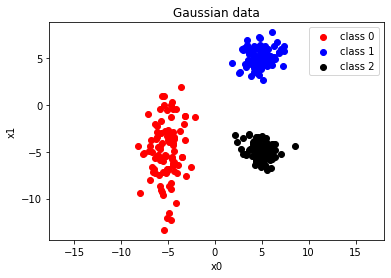

In [42]:
import matplotlib.pyplot as plt


def plot_dataset(X,Y):
    colors = ['r', 'b', 'k', 'g', 'c', 'm', 'y']
    n_classes = np.unique(Y).size

    for k in range(n_classes):
        xk = X[Y==k, :] 
        plt.scatter(xk[:, 0], xk[:, 1], c=colors[k], label='class ' + str(k))

    plt.axis('equal')
    plt.legend()
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.title('Gaussian data')
    plt.show()


n = [100, 100, 100]  # number of points in each class
mu = [ [-5, -5], [+5, +5], [+5, -5] ]
sigma = [[1, 3], [1, 1], [1, 1]]
X, Y = make_gaussian_datasets(n, mu, sigma)
plot_dataset(X,Y)